Customer Segmentation Analysis Part 1

Q. What is Customer Segmentation and why is it important from a marketing perspective?

It involves grouping people who are similar in many areas that are appropriate for marketing, such as age, gender, interests, and purchasing patterns, into a customer base. This makes it possible for a business to directly address a customer who has certain requirements.


Import Libraries and Data


In [174]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np


In [175]:
import warnings 
warnings.simplefilter('ignore')

pip install chardet




import chardet
with open("Sales_data.csv", 'rb') as file: print(chardet.detect(file.read()))



with open("Sales_data.csv", 'rb') as file: print(chardet.detect(file.read()))

In [176]:
# Load the dataset
data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

**Data Exploration**

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [178]:
data.shape

(541909, 8)

In [179]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

**Data Preprocessing**

* Remove Null Values
* Remove Duplicate Values







In [180]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [181]:
data.shape

(406829, 8)

In [182]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [183]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [184]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [185]:
filtered_data.shape

(4380, 2)

In [186]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [187]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


# **Data Insights**
Can we look at Top 10 country customer data

In [188]:
# Check the country wise distribution
data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [189]:
df=filtered_data.Country.value_counts()[:10]

In [190]:
df

United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

Text(0.5, 1.0, ' Top 10 countries customer data ')

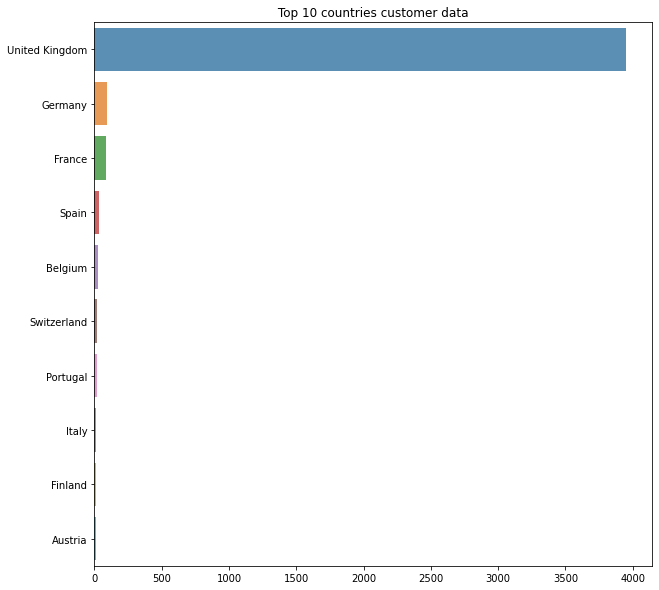

In [191]:
# Plot the data (Make a bar chart)
plt.figure(figsize=(10,10))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title(' Top 10 countries customer data ')

Q. What do you observe?

According to observation, United Kingdom has the highest sales value, almost approaching 4,000, followed by Germany and France, with Austria having the lowest sales value. According to figures, the total sales value from Germany to Austria is much lower than that of the United Kingdom.

In [192]:
## Filter data by the top most country
uk_data=data[data.Country=='United Kingdom']

In [193]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


Q. What do you observe? Which column needs special attention?

I think quantity column should be paid special attention as the quantity cannot be negative number

In [194]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [195]:
uk_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [196]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [197]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [198]:
# Calculate Total Price (Quantity) * Unit Price
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

# **Time frame of data**

In [199]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


Q. Comment on the above results.

From the above output, we can see the min and max dates of uk_data. The min value is 1/10/2011 at 10:32 and the max value is 9/9/2011 at 9:52

# **Perform RFM Analysis**
For Recency, Calculate the number of days between present date and date of last purchase for each customer.
For Frequency, Calculate the number of orders for each customer.
For Monetary, Calculate sum of purchase price for each customer

In [200]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [201]:
# Check Min and Max dates
print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


In [202]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [203]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

#### Q. Comment on the above results


In [204]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [205]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [206]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [207]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [208]:
rfm['recency'] = rfm['recency'].astype(int)
rfm['monetary'] = rfm['monetary'].astype(int)
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


Q. What is wrong with this table?

In this case, CustomerID is a float, but it should be an integer. In addition, there is an unlikely customer who has "0" money, 4596 purchases have been made, and a recent purchase (33719).

In [209]:
# Change the column names
rfm.columns=['recency','frequency','monetary']

# **Create Visuals**

Histogram for Recency Data

Histogram for Frequency Data

Histogram for Monetary Data





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b6660f50>]],
      dtype=object)

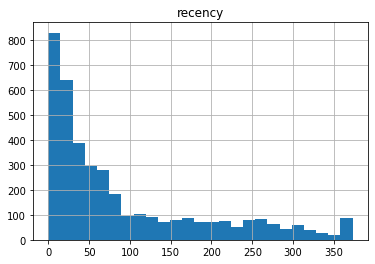

In [210]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency', bins=25)

Q. What does this above chart tell ?

The sales fell down gradually  in the first 100 days and they rose in the last 50 days.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b62a57d0>]],
      dtype=object)

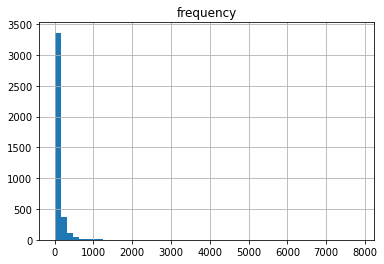

In [211]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency', bins=50)

Q. What does this above chart tell ?

from the extreme skew of the we can say that the customers are frequent buyers. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b65e21d0>]],
      dtype=object)

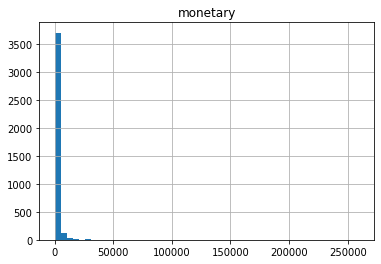

In [212]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary', bins=50)

In [213]:
rfm.sort_values(by=['monetary'], inplace=True)

rfm = rfm[rfm.monetary <10000]

rfm.tail(100)

,recency,frequency,monetary
CustomerID,,,
14049.0,16,488,5681
14110.0,3,156,5683
13468.0,1,302,5704
16553.0,163,84,5719
13178.0,26,265,5725
...,...,...,...
14733.0,16,202,9585
13458.0,7,382,9646
15078.0,7,440,9743


# **Histogram for Monetary Data (UK)**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b638b990>]],
      dtype=object)

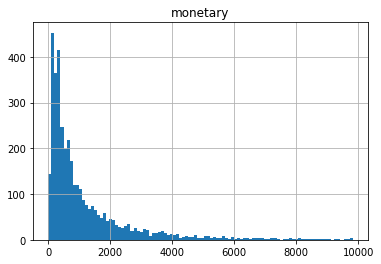

In [214]:
rfm.hist(column='monetary', bins=100)

Q. What does this above chart tell ?

The graph above indicates that the majority of transactions are about $10,000.

The price range can reach $250,000. There might therefore be outliers.

In [215]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

Calcualte the RFM Score

In [216]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 15.0, 0.4: 33.0, 0.6: 72.0, 0.8: 182.0},
 'frequency': {0.2: 13.0, 0.4: 28.0, 0.6: 55.0, 0.8: 115.0},
 'monetary': {0.2: 236.0, 0.4: 450.0, 0.6: 854.0, 0.8: 1822.0}}

In [217]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

In [218]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [219]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [220]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score
CustomerID,,,,,,,
13256.0,14,1,0,5,1,1,511
16738.0,297,1,3,1,1,1,111
16454.0,44,2,6,3,1,1,311
14792.0,63,2,6,3,1,1,311
17956.0,249,1,12,1,1,1,111


In [221]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,14,1,0,5,1,1,511,new customers
16738.0,297,1,3,1,1,1,111,at risk
16454.0,44,2,6,3,1,1,311,needs attention
14792.0,63,2,6,3,1,1,311,needs attention
17956.0,249,1,12,1,1,1,111,at risk


In [222]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose          77
new customers       147
needs attention     477
loyal customers     695
champions           989
at risk            1451
Name: Segment, dtype: int64

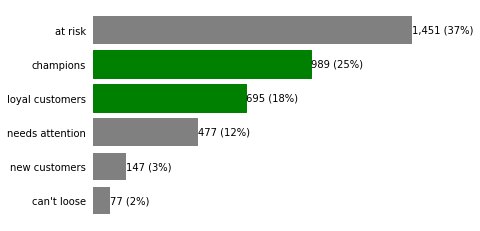

In [223]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Q. Comment on the above chart

The graph indicates that 37% of all customers are potentially departing and hence likely to churn. 12% of all current customers need assistance, and 3% of all new customers are in need.

Q. Who are the best customers?

 Champions and Loyal customers are viewed as the best customers in this context due to their significant revenue contributions to the company.

In [224]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,5,5,5,555,champions
13199.0,3,119,9817,5,5,5,555,champions
15078.0,7,440,9743,5,5,5,555,champions
13458.0,7,382,9646,5,5,5,555,champions
16523.0,1,290,9418,5,5,5,555,champions


Q. Which customers are likely to churn?


In [225]:
#Customers who's recency value is low
rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13093.0,275,159,7832,1,5,5,155,can't loose
17850.0,372,297,5391,1,5,5,155,can't loose
15032.0,256,52,4959,1,3,5,135,at risk
15808.0,306,208,3734,1,5,5,155,can't loose
17230.0,264,69,3638,1,4,5,145,at risk


Churn is most likely to occur among "at risk" customers whose recency value is low. The consumer with customer id 15032 is the one who is most likely to leave, according to the aforementioned chart.

Q. Which customers we are going to loose?


In [226]:
#Customers who's recency, frequency and monetary values are low 
rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
14237.0,373,9,161,1,1,1,111,at risk
17643.0,373,8,101,1,1,1,111,at risk
15350.0,373,5,115,1,1,1,111,at risk
13747.0,373,1,79,1,1,1,111,at risk
15070.0,372,1,106,1,1,1,111,at risk


Customers who's recency, frequency and monetary values are low. so we are at risk of losing  customer with id  13747

Q. Who are the loyal customers?

In [227]:
#Customers with high frequency value
rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,5,5,5,555,champions
13199.0,3,119,9817,5,5,5,555,champions
15078.0,7,440,9743,5,5,5,555,champions
13458.0,7,382,9646,5,5,5,555,champions
14733.0,16,202,9585,4,5,5,455,loyal customers


the customer with id 14733 is a loyal customer

Calculate RFM scores using 4 quartiles and answer all the questions again



In [228]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quantiles = rfm[['recency', 'frequency', 'monetary']].quantile([.25,.5,.75]).to_dict()
quantiles

{'recency': {0.25: 18.0, 0.5: 51.5, 0.75: 147.0},
 'frequency': {0.25: 16.0, 0.5: 40.0, 0.75: 95.0},
 'monetary': {0.25: 293.0, 0.5: 628.0, 0.75: 1476.0}}

In [229]:
def r_score(x):
    if x <= quantiles['recency'][.25]:
        return 4
    elif x <= quantiles['recency'][.5]:
        return 3
    elif x <= quantiles['recency'][.75]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quantiles[c][.25]:
        return 1
    elif x <= quantiles[c][.5]:
        return 2
    elif x <= quantiles[c][.75]:
        return 3
    else:
        return 4

In [230]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [231]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,14,1,0,4,1,1,411,new customers
16738.0,297,1,3,1,1,1,111,at risk
16454.0,44,2,6,3,1,1,311,needs attention
14792.0,63,2,6,2,1,1,211,needs attention
17956.0,249,1,12,1,1,1,111,at risk


In [232]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '3[1-3]': 'needs attention',
    '[3-4][4]': 'loyal customers',
    '[4][1-4]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13256.0,14,1,0,4,1,1,411,champions
16738.0,297,1,3,1,1,1,111,at risk
16454.0,44,2,6,3,1,1,311,needs attention
14792.0,63,2,6,2,1,1,211,at risk
17956.0,249,1,12,1,1,1,111,at risk


In [233]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

champions           507
needs attention     649
loyal customers     762
at risk            1918
Name: Segment, dtype: int64

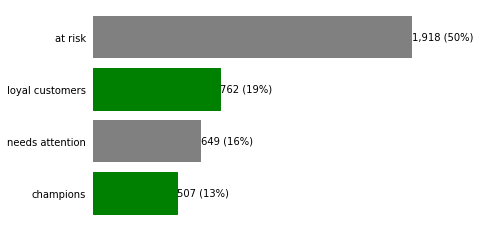

In [234]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [235]:
rfm[rfm['RFM Score']=='444'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,4,4,4,444,loyal customers
13199.0,3,119,9817,4,4,4,444,loyal customers
15078.0,7,440,9743,4,4,4,444,loyal customers
13458.0,7,382,9646,4,4,4,444,loyal customers
14733.0,16,202,9585,4,4,4,444,loyal customers


In [236]:
rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13093.0,275,159,7832,1,4,4,144,at risk
12980.0,157,20,7374,1,2,4,124,at risk
16553.0,163,84,5719,1,3,4,134,at risk
17850.0,372,297,5391,1,4,4,144,at risk
15032.0,256,52,4959,1,3,4,134,at risk


In [237]:
rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
14237.0,373,9,161,1,1,1,111,at risk
13065.0,373,14,205,1,1,1,111,at risk
17643.0,373,8,101,1,1,1,111,at risk
16048.0,373,8,256,1,1,1,111,at risk
13747.0,373,1,79,1,1,1,111,at risk


In [238]:
rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13001.0,4,339,9818,4,4,4,444,loyal customers
13199.0,3,119,9817,4,4,4,444,loyal customers
15078.0,7,440,9743,4,4,4,444,loyal customers
13458.0,7,382,9646,4,4,4,444,loyal customers
14733.0,16,202,9585,4,4,4,444,loyal customers


In [239]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [240]:
# Load rfm data from Part 1
rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')

In [241]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


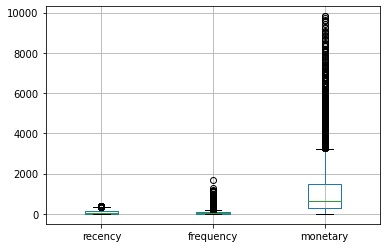

In [242]:

# Create box plots to check for outliers
rfm.boxplot(column = ['recency','frequency','monetary'])

In [243]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

             recency  frequency  monetary
CustomerID                               
13256.0     0.795485   0.667799  0.803362
16738.0     2.041592   0.667799  0.801337
16454.0     0.494735   0.659217  0.799312
14792.0     0.304260   0.659217  0.799312
17956.0     1.560391   0.667799  0.795262
...              ...        ...       ...
14733.0     0.775435   1.057341  5.666188
13458.0     0.865660   2.602242  5.707361
15078.0     0.865660   3.100044  5.772833
13199.0     0.905760   0.344969  5.822780
13001.0     0.895735   2.233182  5.823455

[3836 rows x 3 columns]


In [244]:
rfm_clean = rfm[(z < 3).all(axis=1)]

Q. What is the purpose of the above code

 Creating a clean dataset by removing all the customers whose Z score is less than 3 in all the columns.

In [245]:
rfm.shape

(3836, 3)

In [246]:
rfm_clean.shape

(3683, 3)

In [247]:
X = rfm

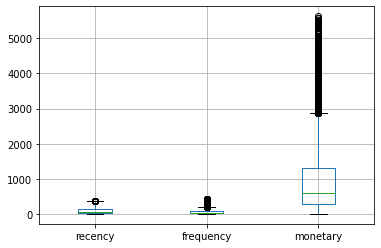

In [248]:
#Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.
rfm_clean.boxplot(column = ['recency','frequency','monetary'])
#The cleaned dataset has less outliers compared with the previous dataset because of filtering the bad data by calculating zscores

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b58a3690>]],
      dtype=object)

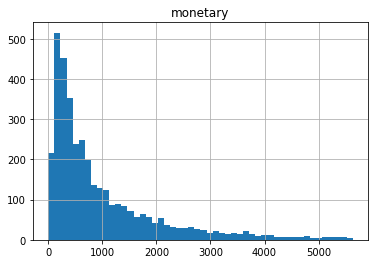

In [249]:
#Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms
rfm_clean.hist(column='monetary', bins=50)
#The cleaned dataset has less outliers compared with the previous dataset because of filtering the bad data by calculating zscores

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b6b40ed0>]],
      dtype=object)

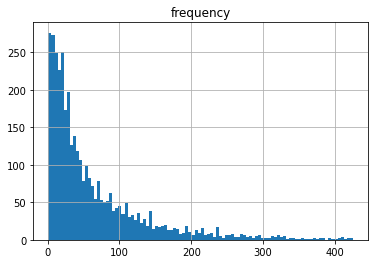

In [250]:
rfm_clean.hist(column='frequency', bins=100)
#The cleaned dataset has less outliers compared with the previous dataset because of filtering the bad data by calculating zscores

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b67b8090>]],
      dtype=object)

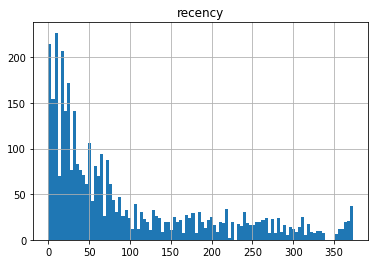

In [251]:
rfm_clean.hist(column='recency', bins=100)
#The cleaned dataset has less outliers compared with the previous dataset because of filtering the bad data by calculating zscores

In [252]:
X.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


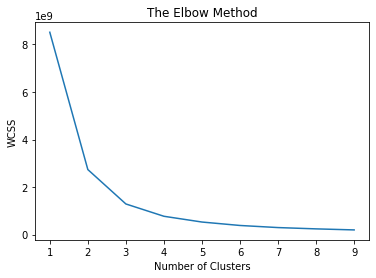

In [253]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [254]:
# Fitting K Means to the Datatset using k = 3
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [255]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [256]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [257]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,14,1,0,0
16738.0,297,1,3,0
16454.0,44,2,6,0
14792.0,63,2,6,0
17956.0,249,1,12,0


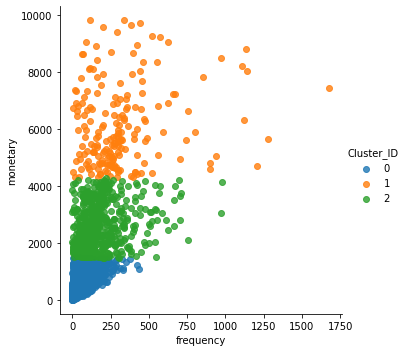

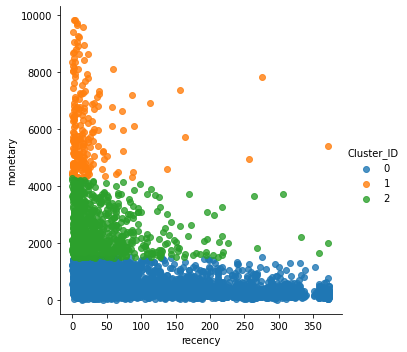

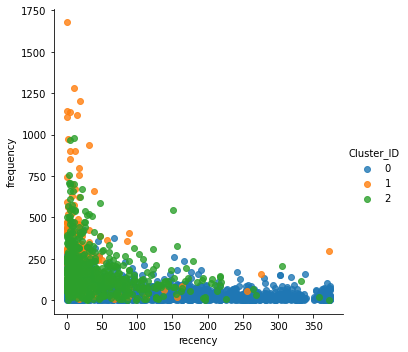

In [258]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

In [259]:
#Q. Comment on the plots
# Plot1 is comparing the Frequency & Monetary which shows that as the Frequency increases, Monetary is also increasing in all the clusters.
# Plot2 shows that for ClusterID 0 even if the Frequency


Q. Perform Cluster Analysis with k=4

In [260]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 4)
y_kmeans = kmeans.fit_predict(X)

In [261]:
y_kmeans

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [262]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [263]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
13256.0,14,1,0,0
16738.0,297,1,3,0
16454.0,44,2,6,0
14792.0,63,2,6,0
17956.0,249,1,12,0


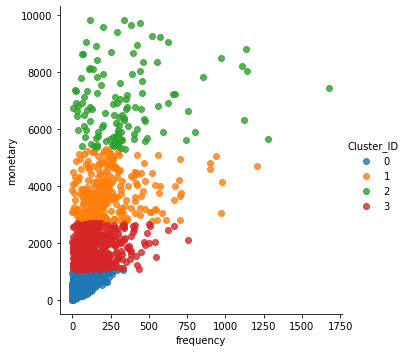

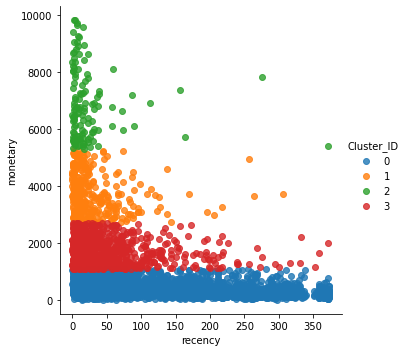

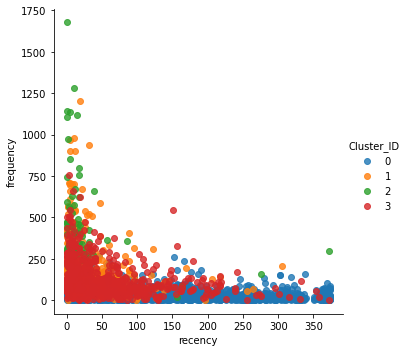

In [264]:

# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

 Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

In [265]:
A = rfm_clean

In [266]:
A.head()

,recency,frequency,monetary
CustomerID,,,
13256.0,14,1,0
16738.0,297,1,3
16454.0,44,2,6
14792.0,63,2,6
17956.0,249,1,12


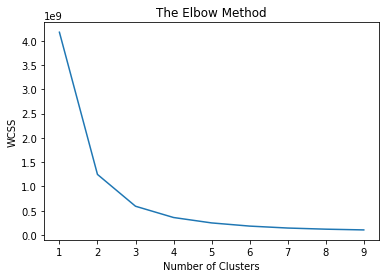

In [267]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(A)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [268]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
z_kmeans = kmeans.fit_predict(A)

In [269]:
z_kmeans

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [270]:
# Adding cluster ID to the dataframe
rfm_clean['Cluster_ID'] = z_kmeans

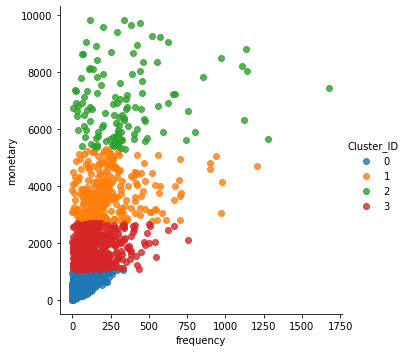

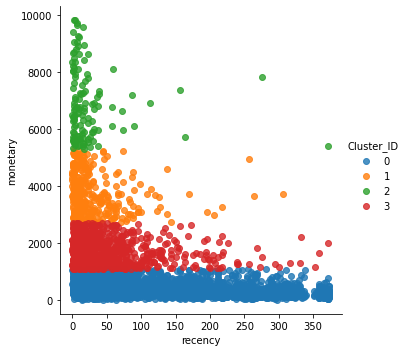

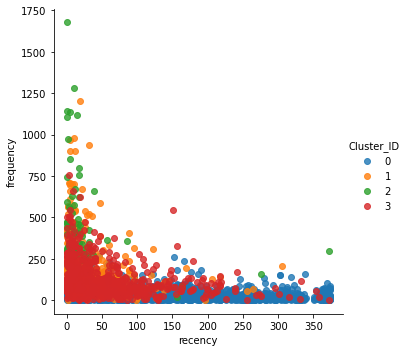

In [271]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Calculate mean for every cluster

In [272]:
for i in range(4): rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

In [273]:
rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,48.783293,110.561743,1734.914044
1,33.534483,183.531034,3817.748276
2,118.843787,35.651344,433.631866
